### MARKET SEGMENTATION ANALYSIS

### Case Study - Fast Food

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fastFoodData = pd.read_csv('mcdonalds.csv')

In [3]:
fastFoodData.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [4]:
fastFoodData.shape

(1453, 15)

In [5]:
fastFoodData.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
# We can that the dataset has 1453 rows and 15 columns and we can see the attributes that are used for the analysis

In [7]:
# we can also see that the segmentation variables are categorical and not numerical
fastFoodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
fastFoodData.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
fastFoodData['Gender'].value_counts()
fastFoodData['VisitFrequency'].value_counts()
fastFoodData['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

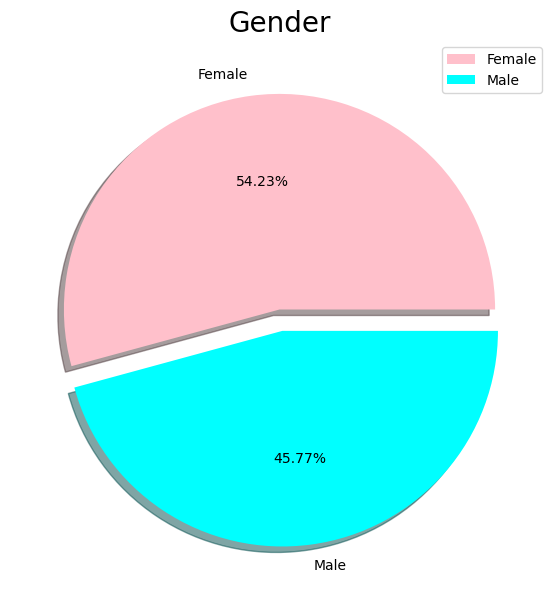

In [10]:
#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = fastFoodData['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


In [11]:
# there are more female than male customers

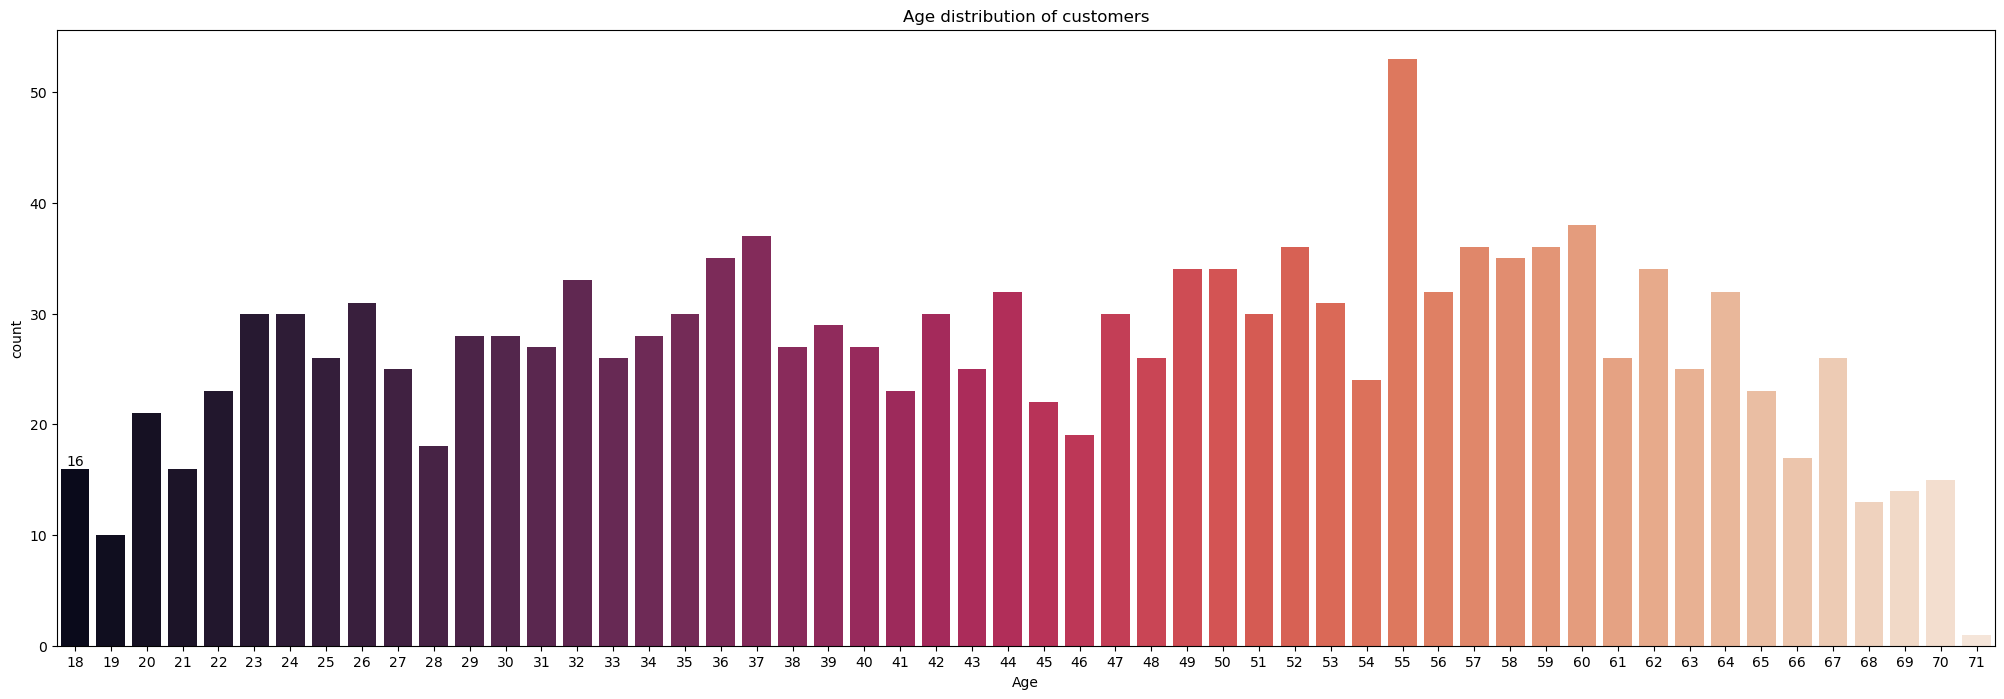

In [12]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=fastFoodData['Age'],palette = 'rocket')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

In [13]:
# Macdonalds has more cusstomers in the age group of 35 to 40 and 50 to 60

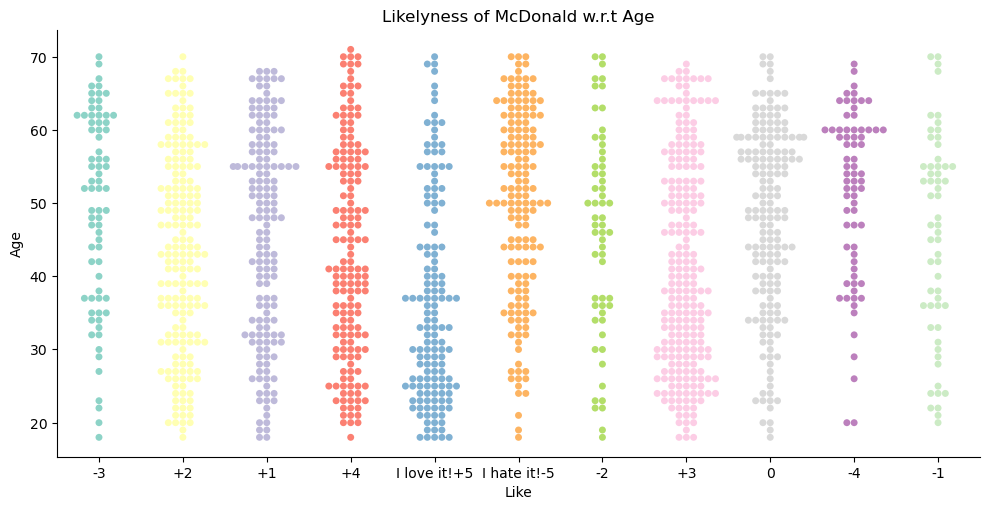

In [14]:
#Customer segmentation - based on pyschographic segmentation
#Like Variable
sns.catplot(x="Like", y="Age",data=fastFoodData, 
            orient="v", height=5, aspect=2, palette="Set3",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [15]:
# Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    fastFoodData[x] = LabelEncoder().fit_transform(fastFoodData[x])
    return fastFoodData

categorical = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in categorical:
    labelling(i)
fastFoodData

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


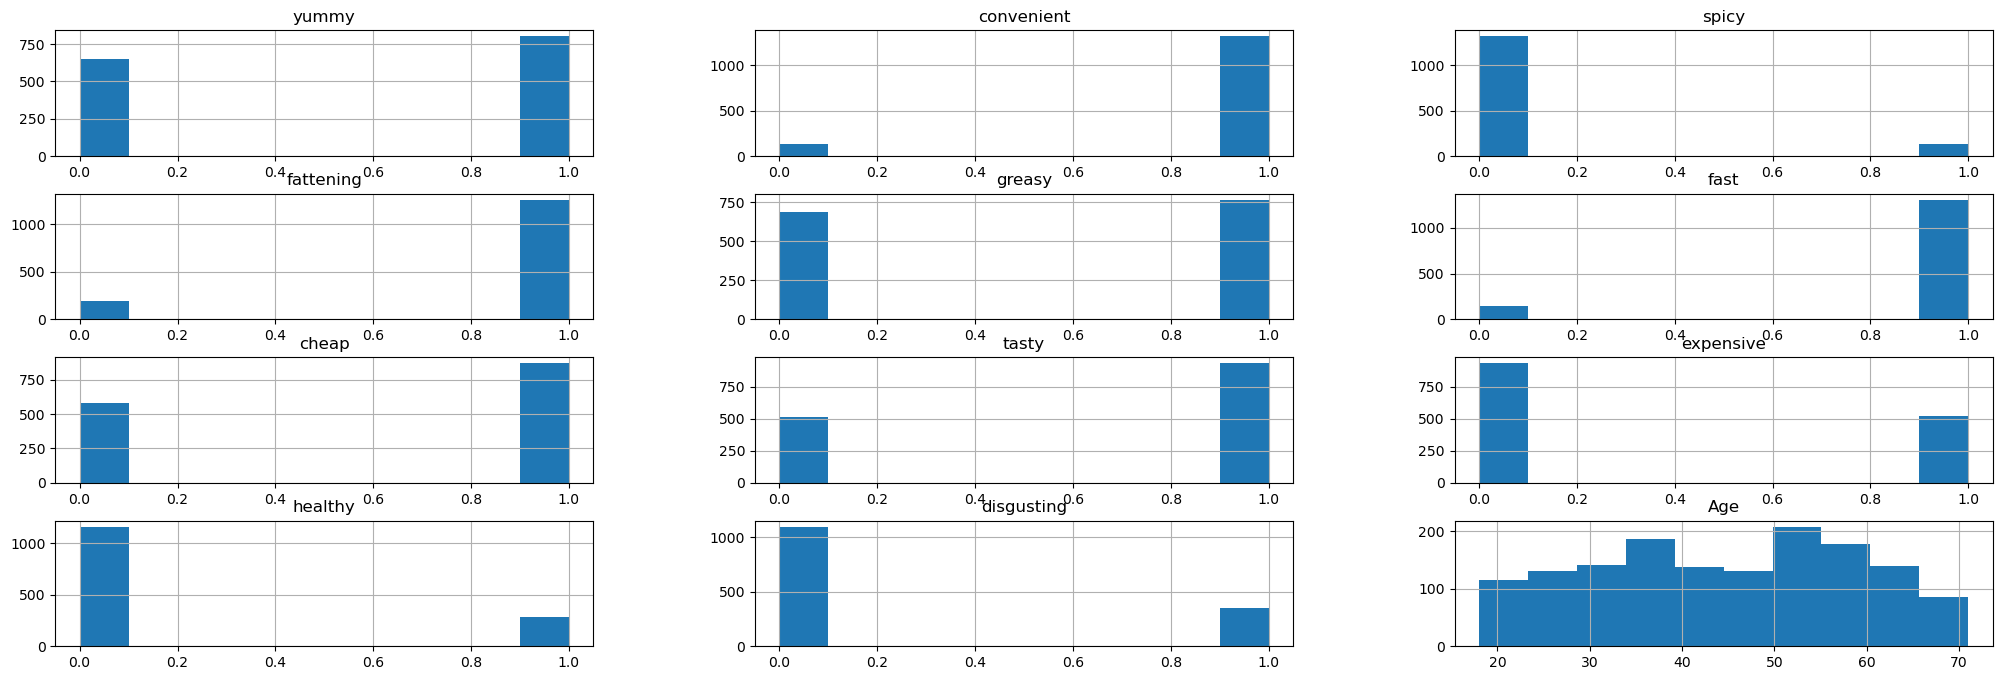

In [16]:
# Histogram graph of all the attributes
fastFoodData.hist()
plt.show()

In [17]:
# Considering only categorical attributes
segment_variables = fastFoodData.loc[:,categorical]
segment_variables

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [18]:
x = fastFoodData.loc[:,categorical].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [19]:
# PCA - Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [20]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [22]:
# correlation coefficient between original variables and the component

loadings = pca.components_
# num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1,12))]
loadings_data = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_data['variable'] = segment_variables.columns.values
loadings_data = loadings_data.set_index('variable')
loadings_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


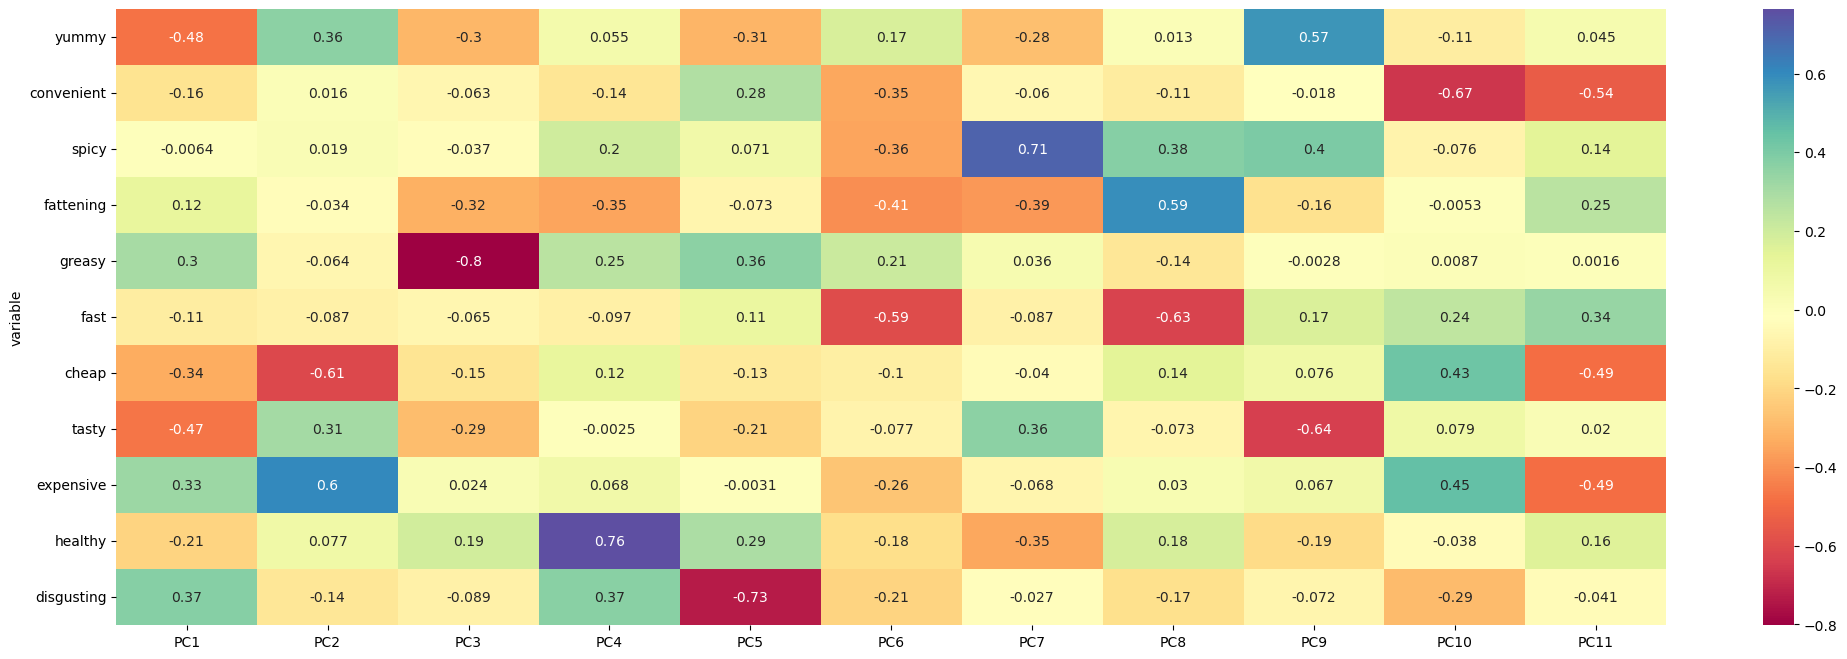

In [23]:
ax = sns.heatmap(loadings_data, annot=True, cmap='Spectral')
plt.show()

In [24]:
# pip install seaborn --upgrade

In [25]:
# !pip install bioinfokit

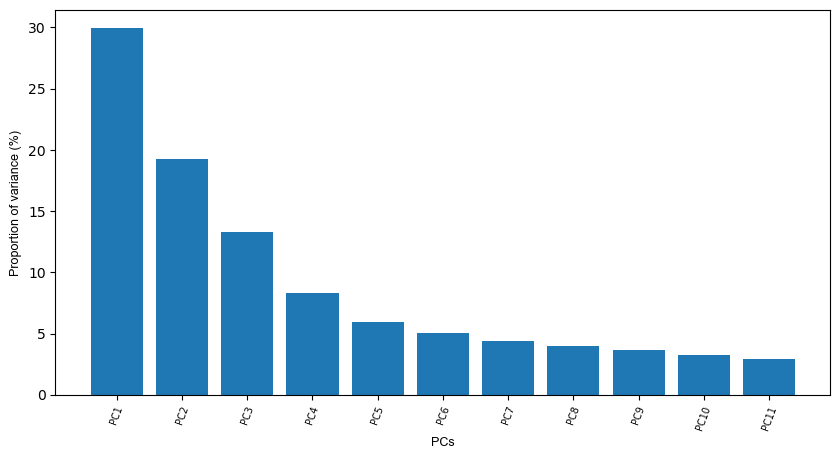

In [26]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

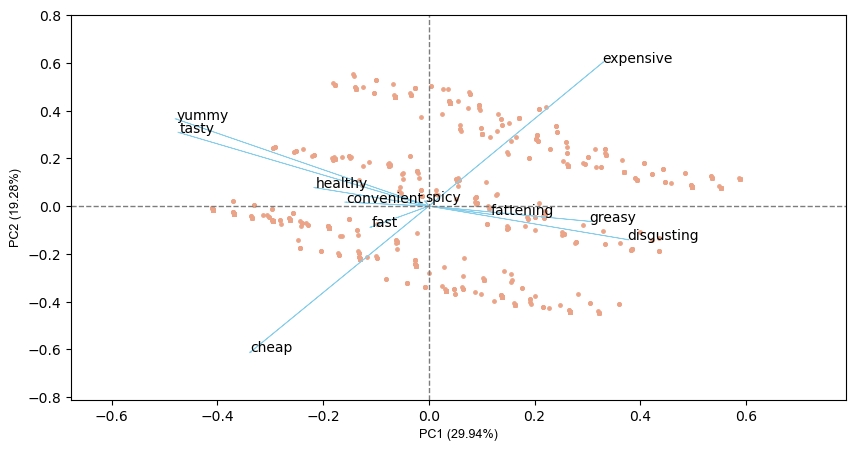

In [27]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=fastFoodData.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

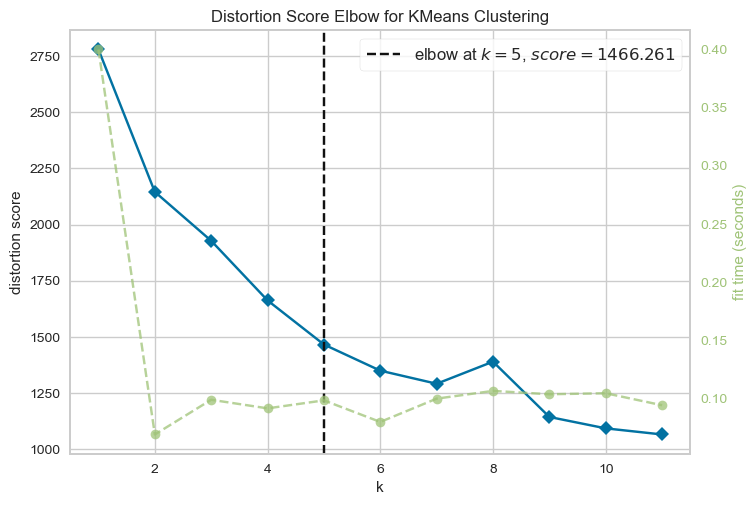

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(segment_variables)
visualizer.show()

In [29]:
# pip install yellowbrick

In [30]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(segment_variables)
fastFoodData['cluster_numbers'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[0 3 1 ... 1 3 1]
1748.9687521158025
9
[[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -2.22044605e-16
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [-2.22044605e-16  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]


In [31]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 553, 1: 473, 0: 296, 2: 131})

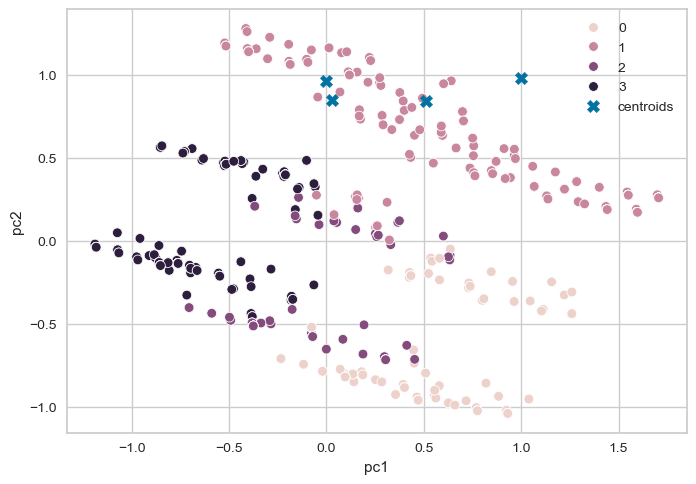

In [32]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="b", s=80, label="centroids")
plt.legend()
plt.show()

In [33]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(fastFoodData['cluster_numbers'],fastFoodData['Like'])
#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 


Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_numbers,,,,,,,,,,,
0,71,37,36,27,22,44,19,27,12,1,0
1,73,26,30,22,16,63,47,56,66,40,34
2,6,5,7,5,11,29,34,20,10,4,0
3,2,3,0,5,9,33,52,84,141,115,109


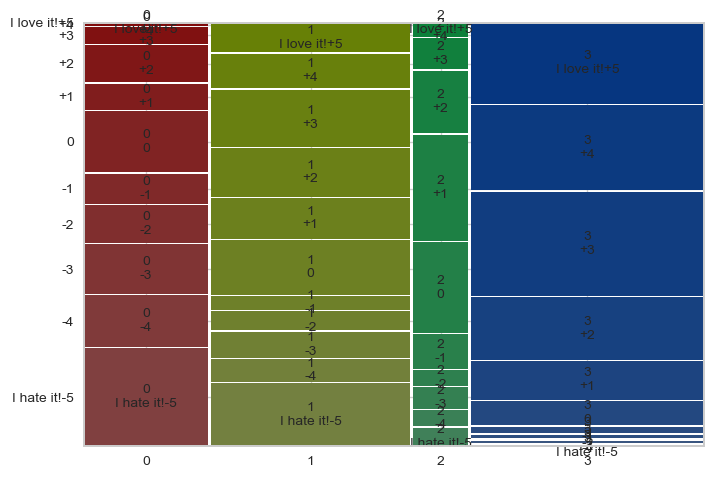

In [34]:
mosaic(crosstab.stack())
plt.show()

In [35]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(fastFoodData['cluster_numbers'],fastFoodData['Gender'])
crosstab_gender

Gender,Female,Male
cluster_numbers,,
0,168,128
1,214,259
2,75,56
3,331,222


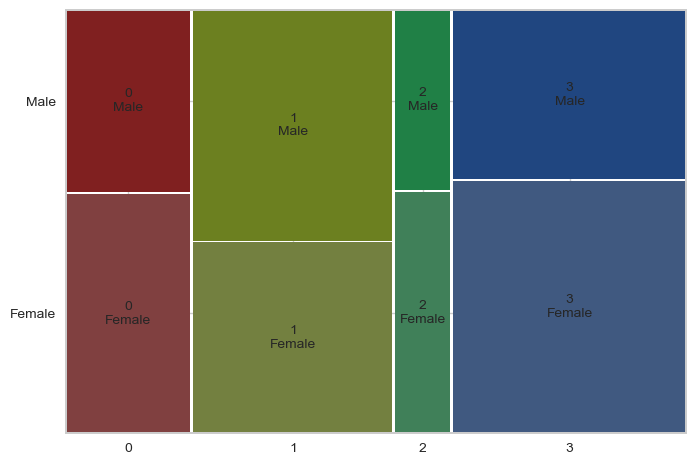

In [36]:
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_numbers', ylabel='Age'>

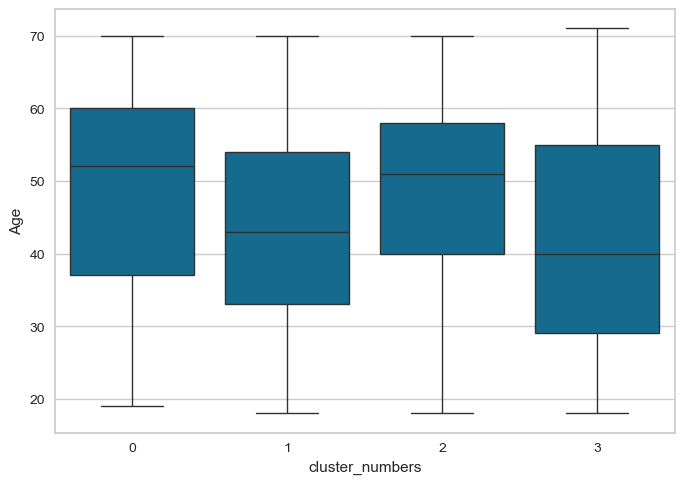

In [37]:
#box plot for age

sns.boxplot(x="cluster_numbers", y="Age", data=fastFoodData)

In [38]:
# Selecting Target Segment

#Calculating the mean
#Visit frequency
fastFoodData['VisitFrequency'] = LabelEncoder().fit_transform(fastFoodData['VisitFrequency'])
visit = fastFoodData.groupby('cluster_numbers')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_numbers,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [39]:
#Like
fastFoodData['Like'] = LabelEncoder().fit_transform(fastFoodData['Like'])
Like = fastFoodData.groupby('cluster_numbers')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_numbers,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [40]:
fastFoodData['Gender'] = LabelEncoder().fit_transform(fastFoodData['Gender'])
Gender = fastFoodData.groupby('cluster_numbers')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_numbers,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [41]:
segment = Gender.merge(Like, on='cluster_numbers', how='left').merge(visit, on='cluster_numbers', how='left')
segment

,cluster_numbers,Gender,Like,VisitFrequency
0,0,0.432432,5.888514,2.787162
1,1,0.547569,4.957717,2.596195
2,2,0.427481,3.694656,2.618321
3,3,0.401447,3.915009,2.598553


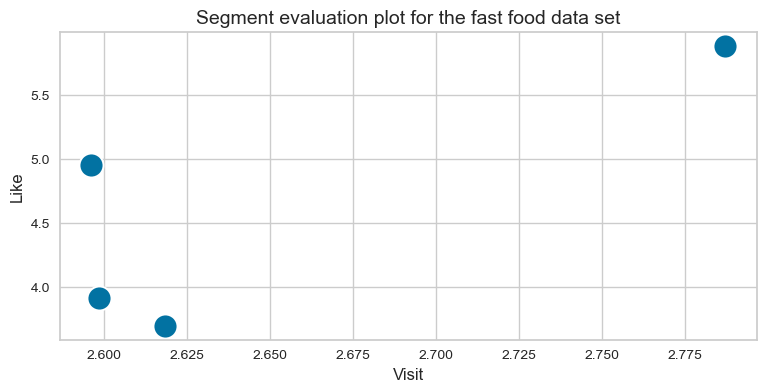

In [42]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=300, color="b")
plt.title("Segment evaluation plot for the fast food data set",
          fontsize = 14) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()
